$\textbf{1. Dane}$

In [1]:
import pandas as pd
dataset = pd.read_csv("Plaga.csv", delimiter=',', skipinitialspace = True)

In [2]:
pd.set_option('display.max_columns', 55)
dataset.head(15)

,Diagnosis,InitialPCRDiagnosis,Age,Sex,Region,CommunityTransmission,NumberOfFamilyMembersInfected,neutrophil,neutrophilCategorical,serumLevelsOfWhiteBloodCell,serumLevelsOfWhiteBloodCellCategorical,lymphocytes,lymphocytesCategorical,Plateletes,CReactiveProteinLevels,CReactiveProteinLevelsCategorical,Eosinophils,Red blood cells,Hemoglobin,Procalcitonin,DurationOfIllness,DaysToDeath,DaysInIncubation,CTscanResults,XrayResults,RiskFactors,SmokingStatus,VapingStatus,NumberAffectedLobes,GroundGlassOpacity,Asymptomatic,Diarrhea,Fever,Coughing,ShortnessOfBreath,SoreThroat,NauseaVomitting,TimeBetweenAdmissionAndDiagnosis,Pregnant,BabyDeath,PrematureDelivery,Temperature,Hematocrit,ActivatedPartialThromboplastinTime,Fibrinogen,Urea,Fatigue,Monocytes,Basophil,Cancer,Thrombocytes
0,Grypa,NaN,67.0,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,NaN,No,NaN,NaN,NaN,NaN,NaN,38.111111,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN
1,Grypa,NaN,29.0,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Grypa,NaN,22.0,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Grypa,NaN,20.0,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,immuno,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,NaN,No,NaN,NaN,NaN,NaN,NaN,36.555556,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN
4,Grypa,NaN,21.0,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Grypa,NaN,22.0,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Grypa,NaN,19.0,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Grypa,NaN,60.0,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Renal Disease, athero",NaN,NaN,NaN,NaN,NaN,NaN,No,Yes,NaN,No,NaN,NaN,NaN,NaN,NaN,38.166667,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN
8,Grypa,NaN,46.0,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,NaN,No,NaN,NaN,NaN,NaN,NaN,38.611111,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN
9,Grypa,NaN,18.0,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
len(dataset)

1485

In [4]:
print(dataset.isnull().sum().head(55))

Diagnosis                                    0
InitialPCRDiagnosis                       1381
Age                                         28
Sex                                         76
Region                                    1167
CommunityTransmission                     1236
NumberOfFamilyMembersInfected             1431
neutrophil                                1382
neutrophilCategorical                     1337
serumLevelsOfWhiteBloodCell               1334
serumLevelsOfWhiteBloodCellCategorical    1294
lymphocytes                               1327
lymphocytesCategorical                    1290
Plateletes                                1435
CReactiveProteinLevels                    1346
CReactiveProteinLevelsCategorical         1327
Eosinophils                               1477
Red blood cells                           1481
Hemoglobin                                1461
Procalcitonin                             1452
DurationOfIllness                         1397
DaysToDeath  

In [5]:
dataset = dataset.drop(['Sex','Region', 'CommunityTransmission' ,'Monocytes', 'Thrombocytes', 'Hemoglobin','Cancer', 'Basophil', 
                        'Fibrinogen', 'DaysToDeath','ActivatedPartialThromboplastinTime', 'Hematocrit', 
                        'GroundGlassOpacity', 'Procalcitonin', 'NumberAffectedLobes', 'VapingStatus', 
                        'SmokingStatus', 'Red blood cells','Eosinophils', 'Plateletes', 'Urea', 'DaysInIncubation',
                        'TimeBetweenAdmissionAndDiagnosis'], axis =1)

Wiedza ekspercka:
"CRP levels have been consistently shown to be significantly higher in H1N1 influenza patients who develop a severe disease outcome."
Zasadniczo poziom białka C-reaktywnego we krwi może być markerem ciężkości przebiegu infekcji wirusowej, ale nie wydaje się być markerem różnicującym rodzaj wirusa, którym organizm został zakażony.
Zatem wobec niedużej ilości wierszy posiadających informację na temat stężenia CRP we krwi, pozbędziemy się kolumn "CReactiveProteinLevelsCategorical" oraz "CReactiveProteinLevels"

In [6]:
dataset = dataset.drop(['CReactiveProteinLevelsCategorical', 'CReactiveProteinLevels'], axis = 1)

In [7]:
dataset['InitialPCRDiagnosis'].value_counts()

Pos     98
Neg      4
Pos      1
pos      1
Name: InitialPCRDiagnosis, dtype: int64

In [8]:
dataset.loc[dataset['InitialPCRDiagnosis'] == 'Neg']

,Diagnosis,InitialPCRDiagnosis,Age,NumberOfFamilyMembersInfected,neutrophil,neutrophilCategorical,serumLevelsOfWhiteBloodCell,serumLevelsOfWhiteBloodCellCategorical,lymphocytes,lymphocytesCategorical,DurationOfIllness,CTscanResults,XrayResults,RiskFactors,Asymptomatic,Diarrhea,Fever,Coughing,ShortnessOfBreath,SoreThroat,NauseaVomitting,Pregnant,BabyDeath,PrematureDelivery,Temperature,Fatigue
1217,COVID19,Neg,75.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pos,NaN,NaN,NaN,Yes,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN
1325,COVID19,Neg,42.0,NaN,NaN,NaN,NaN,Normal,0.81,low,37.0,Neg,NaN,NaN,NaN,Yes,Yes,Yes,NaN,Yes,Yes,No,NaN,NaN,38.7,NaN
1333,COVID19,Neg,62.0,NaN,7.53,normal,NaN,NaN,0.27,low,18.0,Pos,NaN,Hypertension and COPD,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1446,COVID19,Neg,69.0,NaN,NaN,NaN,8.23,normal,0.77,low,NaN,Pos,NaN,influenza,NaN,NaN,Yes,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Zmienna "InitialPCRDiagnosis" także, jak widać, nic nie wnosi do analizy.

In [9]:
dataset = dataset.drop(['InitialPCRDiagnosis'], axis = 1)

In [10]:
print(dataset.isnull().sum().head(60))

Diagnosis                                    0
Age                                         28
NumberOfFamilyMembersInfected             1431
neutrophil                                1382
neutrophilCategorical                     1337
serumLevelsOfWhiteBloodCell               1334
serumLevelsOfWhiteBloodCellCategorical    1294
lymphocytes                               1327
lymphocytesCategorical                    1290
DurationOfIllness                         1397
CTscanResults                             1324
XrayResults                               1438
RiskFactors                               1259
Asymptomatic                              1464
Diarrhea                                  1035
Fever                                      559
Coughing                                   623
ShortnessOfBreath                         1410
SoreThroat                                 815
NauseaVomitting                           1063
Pregnant                                  1420
BabyDeath    

In [11]:
dataset['XrayResults'].value_counts()

Pos    35
Neg    12
Name: XrayResults, dtype: int64

In [12]:
dataset.loc[dataset['XrayResults'] == 'Neg']

,Diagnosis,Age,NumberOfFamilyMembersInfected,neutrophil,neutrophilCategorical,serumLevelsOfWhiteBloodCell,serumLevelsOfWhiteBloodCellCategorical,lymphocytes,lymphocytesCategorical,DurationOfIllness,CTscanResults,XrayResults,RiskFactors,Asymptomatic,Diarrhea,Fever,Coughing,ShortnessOfBreath,SoreThroat,NauseaVomitting,Pregnant,BabyDeath,PrematureDelivery,Temperature,Fatigue
1083,COVID19,NaN,NaN,NaN,NaN,NaN,NaN,0.87,low,NaN,Pos,Neg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1084,COVID19,NaN,NaN,1.73,normal,NaN,NaN,0.81,low,NaN,Pos,Neg,HepB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1085,COVID19,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pos,Neg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1099,COVID19,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,Pos,Neg,obesity,NaN,Yes,Yes,Yes,NaN,Yes,NaN,No,NaN,NaN,NaN,NaN
1100,COVID19,57.0,NaN,NaN,NaN,NaN,NaN,0.43,low,NaN,NaN,Neg,NaN,NaN,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1101,COVID19,57.0,NaN,NaN,NaN,NaN,NaN,0.94,low,NaN,NaN,Neg,NaN,NaN,NaN,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1127,COVID19,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Neg,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1235,COVID19,66.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pos,Neg,NaN,NaN,No,Yes,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN
1284,COVID19,10.0,2.0,NaN,NaN,4.08,low,NaN,NaN,NaN,Pos,Neg,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1322,COVID19,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Neg,NaN,NaN,NaN,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
dataset.loc[dataset['XrayResults'] == 'Pos']

,Diagnosis,Age,NumberOfFamilyMembersInfected,neutrophil,neutrophilCategorical,serumLevelsOfWhiteBloodCell,serumLevelsOfWhiteBloodCellCategorical,lymphocytes,lymphocytesCategorical,DurationOfIllness,CTscanResults,XrayResults,RiskFactors,Asymptomatic,Diarrhea,Fever,Coughing,ShortnessOfBreath,SoreThroat,NauseaVomitting,Pregnant,BabyDeath,PrematureDelivery,Temperature,Fatigue
1075,COVID19,61.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN,Pos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1115,COVID19,46.000,NaN,NaN,NaN,4.20,low,1.49,normal,24.0,NaN,Pos,Hypertension,NaN,No,Yes,Yes,Yes,No,NaN,No,NaN,NaN,NaN,NaN
1117,COVID19,60.000,NaN,3.310,normal,NaN,NaN,NaN,NaN,NaN,NaN,Pos,NaN,NaN,No,Yes,Yes,No,No,NaN,No,NaN,NaN,NaN,NaN
1128,COVID19,34.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pos,diabetes,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1129,COVID19,43.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pos,NaN,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
1152,COVID19,52.000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pos,diabetes,NaN,NaN,Yes,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN
1153,COVID19,50.000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1155,COVID19,1.000,NaN,NaN,low,NaN,normal,NaN,low,NaN,Pos,Pos,NaN,NaN,NaN,Yes,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1210,COVID19,42.000,NaN,NaN,NaN,2.88,low,0.9,low,25.0,Pos,Pos,NaN,NaN,NaN,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1216,COVID19,65.000,NaN,NaN,normal,NaN,NaN,NaN,normal,NaN,NaN,Pos,NaN,NaN,No,No,No,No,Yes,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
dataset['CTscanResults'].value_counts()

Pos             142
Neg              12
Pos               3
neg               2
Inconclusive      1
Neg               1
Name: CTscanResults, dtype: int64

In [15]:
ct = dataset.loc[dataset['CTscanResults'] == 'Pos']
len(ct.loc[ct['Diagnosis'] == 'COVID19'])

121

In [16]:
ct = dataset.loc[dataset['CTscanResults'] == 'Neg']
len(ct.loc[ct['Diagnosis'] == 'COVID19'])

12

Jak widać, informacje na temat wyników badań RTG/CT poza tym, że nieliczne, to dostępne są głównie dla przypadków zdiagnozowanych jako COVID19 - oczywiście to może wynikać z tego, że np. u tych pacjentów z racji ich objawów podejrzewano zmiany w płucach, i dlatego skierowano ich na te badania - jednak nie mamy takich informacji, równie dobrze mogły to być badania profilaktyczne wynikające z nadmiernego strachu przed nowym wirusem. A zmiany w płucach mogą także być skutkiem wcześniej przebytych chorób. 
W dodatku mniej niż 10% rekordów posiada te informacje. W związku z tym kolumny "XrayResults" oraz "CTscanResults" również usuwamy. Przed tem jednak wykorzystamy tę kolumnę do uzupełnienia danych w kolumnie "Cooughing": u pacjentów z pozytywnym wynikiem CT zdecydowanie dominuje występowanie kaszlu, stąd dla wierszów z wartością "Pos" w kolumnie CTscanResults wartości null w kolumnie "Coughing" zastąpimy wartością "Yes".

In [17]:
for i in dataset.index:
    if dataset.at[i, 'CTscanResults'] == "Pos":
        if dataset.at[i, 'Coughing']!="No":
            dataset.at[i, 'Coughing'] = "Yes"

In [18]:
dataset = dataset.drop(['XrayResults', 'CTscanResults'], axis = 1)

In [19]:
dataset.isnull().sum()

Diagnosis                                    0
Age                                         28
NumberOfFamilyMembersInfected             1431
neutrophil                                1382
neutrophilCategorical                     1337
serumLevelsOfWhiteBloodCell               1334
serumLevelsOfWhiteBloodCellCategorical    1294
lymphocytes                               1327
lymphocytesCategorical                    1290
DurationOfIllness                         1397
RiskFactors                               1259
Asymptomatic                              1464
Diarrhea                                  1035
Fever                                      559
Coughing                                   559
ShortnessOfBreath                         1410
SoreThroat                                 815
NauseaVomitting                           1063
Pregnant                                  1420
BabyDeath                                 1445
PrematureDelivery                         1470
Temperature  

In [20]:
preg = dataset['Pregnant']

In [21]:
preg = list(preg)
for i in range(len(preg)):
    if preg[i] != 'Yes':
        preg[i] = 'No'
        
dataset['Pregnant'] = preg      

In [22]:
dataset['BabyDeath'].value_counts()

No     29
Yes     9
6h      2
Name: BabyDeath, dtype: int64

In [23]:
babdth = dataset['BabyDeath']
babdth = list(babdth)
for i in range(len(babdth)):
    if babdth[i] not in {'Yes', '6h'}:
        babdth[i] = 'No'
        
dataset['BabyDeath'] = babdth

In [24]:
dataset['PrematureDelivery'].value_counts()

Yes    9
No     4
No     2
Name: PrematureDelivery, dtype: int64

Ta kolumna wydaje się być skorelowana z poprzednią (prawdopodobnie śmierć dziecka nastąpiła w wyniku przedwczesnego porodu = poronienia), więc ją usuwamy:

In [25]:
dataset = dataset.drop(['PrematureDelivery'], axis = 1)

In [26]:
for i in dataset.index:
    if dataset.at[i, 'Asymptomatic'] == 'Yes': 
        dataset.at[i, 'Fever'] = 'No'
        dataset.at[i, 'Temperature'] = 36.6
        dataset.at[i, 'Coughing'] = 'No'
        dataset.at[i, 'SoreThroat'] = 'No'
        dataset.at[i, 'NauseaVomitting'] = 'No'
        dataset.at[i, 'Diarrhea'] = 'No'
        dataset.at[i, 'DurationOfIllness'] = 0
        dataset.at[i, 'ShortnessOfBreath'] = 'No'
        dataset.at[i, 'Fatigue'] = 'No'

In [27]:
dataset = dataset.drop(['Asymptomatic'], axis = 1)

In [28]:
dataset.isnull().sum()

Diagnosis                                    0
Age                                         28
NumberOfFamilyMembersInfected             1431
neutrophil                                1382
neutrophilCategorical                     1337
serumLevelsOfWhiteBloodCell               1334
serumLevelsOfWhiteBloodCellCategorical    1294
lymphocytes                               1327
lymphocytesCategorical                    1290
DurationOfIllness                         1378
RiskFactors                               1259
Diarrhea                                  1016
Fever                                      540
Coughing                                   543
ShortnessOfBreath                         1391
SoreThroat                                 795
NauseaVomitting                           1043
Pregnant                                     0
BabyDeath                                    0
Temperature                                836
Fatigue                                    934
dtype: int64

In [29]:
for i in dataset.index:
    if dataset.at[i, 'Diagnosis'] == 'COVID19': 
        if dataset.at[i,'NumberOfFamilyMembersInfected'] != 0:
            dataset.at[i, 'NumberOfFamilyMembersInfected'] = 1
    else:
        dataset.at[i, 'NumberOfFamilyMembersInfected'] = 0

In [30]:
dataset.isnull().sum()

Diagnosis                                    0
Age                                         28
NumberOfFamilyMembersInfected                0
neutrophil                                1382
neutrophilCategorical                     1337
serumLevelsOfWhiteBloodCell               1334
serumLevelsOfWhiteBloodCellCategorical    1294
lymphocytes                               1327
lymphocytesCategorical                    1290
DurationOfIllness                         1378
RiskFactors                               1259
Diarrhea                                  1016
Fever                                      540
Coughing                                   543
ShortnessOfBreath                         1391
SoreThroat                                 795
NauseaVomitting                           1043
Pregnant                                     0
BabyDeath                                    0
Temperature                                836
Fatigue                                    934
dtype: int64

In [31]:
dataset['Fever'].value_counts()

Yes     778
No      166
Yes       1
Name: Fever, dtype: int64

In [32]:
dataset['Fever'] = dataset['Fever'].replace("Yes ", "Yes")

In [33]:
for i in dataset.index:
    if dataset.at[i, 'Temperature'] >= 37.95: 
        dataset.at[i, 'Fever'] = 'Yes'
    if dataset.at[i, 'Temperature'] < 37.95: 
        dataset.at[i, 'Fever'] = 'No'
        
import statistics as stat  
fev = dataset.loc[dataset['Fever'] == 'Yes']
fev = list(fev['Temperature'])
fev = [x for x in fev if x>0]
nof = dataset.loc[dataset['Fever'] == 'No']
nof = list(nof['Temperature']) 
nof = [x for x in nof if x>0]
mean1 = stat.mean(fev)
mean2 = stat.mean(nof)

In [34]:
import numpy as np
dataset['Temperature']=dataset['Temperature'].replace(np.nan, 0)
for i in dataset.index:
    if dataset.at[i, 'Fever'] == 'Yes':
        if dataset.at[i,'Temperature']==0:
           dataset.at[i,'Temperature']= mean1
    elif dataset.at[i, 'Fever'] == 'No':
        if dataset.at[i,'Temperature']==0:
           dataset.at[i,'Temperature']= mean2
dataset['Temperature']=dataset['Temperature'].replace(0, np.nan)

flu_temp = dataset.loc[dataset['Diagnosis'] == 'Grypa']
flu_temp = flu_temp[:]
flu_temp = flu_temp.dropna(subset = ['Temperature'])
flu_temp = list(flu_temp['Temperature'])
mean_flu = stat.mean(flu_temp)

cov_temp = dataset.loc[dataset['Diagnosis'] == 'COVID19']
cov_temp = cov_temp[:]
cov_temp = cov_temp.dropna(subset = ['Temperature'])
cov_temp = list(cov_temp['Temperature'])
mean_cov = stat.mean(cov_temp)

for i in dataset.index:
    if dataset.at[i, 'Diagnosis'] == 'COVID19':
        if not dataset.at[i, 'Temperature']:
            dataset.at[i, 'Temperature'] = mean_cov
    else:
        if not dataset.at[i, 'Temperature']:
            dataset.at[i, 'Temperature'] = mean_flu
            


In [35]:
ages = list(dataset['Age'])
ages = [x for x in ages if x>0]
age_mean = stat.mean(ages)
dataset['Age']=dataset['Age'].replace(np.nan, age_mean)

In [36]:
dataset = dataset.dropna(subset = ['Coughing'])

In [37]:
len(dataset)

942

In [38]:
dataset.isnull().sum()

Diagnosis                                   0
Age                                         0
NumberOfFamilyMembersInfected               0
neutrophil                                859
neutrophilCategorical                     820
serumLevelsOfWhiteBloodCell               823
serumLevelsOfWhiteBloodCellCategorical    800
lymphocytes                               809
lymphocytesCategorical                    783
DurationOfIllness                         876
RiskFactors                               741
Diarrhea                                  482
Fever                                      87
Coughing                                    0
ShortnessOfBreath                         854
SoreThroat                                261
NauseaVomitting                           505
Pregnant                                    0
BabyDeath                                   0
Temperature                                87
Fatigue                                   393
dtype: int64

In [39]:
dataset['RiskFactors'].value_counts()

asthma                                                                36
pneumonia                                                             21
immuno                                                                20
None                                                                  11
diabetes                                                              11
chronic                                                                9
Hypertension                                                           7
congestive, diabetes, Renal Disease                                    7
influenza                                                              6
chronic, diabetes                                                      5
asthma, diabetes                                                       5
Heart Disease                                                          4
Renal Disease                                                          4
asthma, respiratory disease                        

In [40]:
dataset['RiskFactors'] = dataset['RiskFactors'].replace(np.nan, "No data")
zeros = np.zeros(len(dataset))

dataset['Diabetes'] = zeros
dataset['Immuno'] = zeros
dataset['Hypertension'] = zeros
dataset['RenalDisease'] = zeros
dataset['Pneumonia'] = zeros
dataset['RiskNoData'] = zeros

import re
pattern1 = re.compile("asthma")
pattern2 = re.compile("diabetes")
pattern3 = re.compile("immuno")
pattern4 = re.compile("pneumonia")
pattern5 = re.compile("Renal Disease")
pattern6 = re.compile("Hypertension|hypertension")


for i in dataset.index:
    result = re.search(pattern1, dataset.at[i, 'RiskFactors'])
    result2 = re.search(pattern2, dataset.at[i, 'RiskFactors'])
    result3 = re.search(pattern3, dataset.at[i, 'RiskFactors'])
    result4 = re.search(pattern4, dataset.at[i, 'RiskFactors'])
    result5 = re.search(pattern5, dataset.at[i, 'RiskFactors'])
    result6 = re.search(pattern6, dataset.at[i, 'RiskFactors'])
  
    
    if result:
        dataset.at[i, 'Asthma'] = 1
    else:
        if dataset.at[i, 'RiskFactors'] == 'No data':
           dataset.at[i, 'Asthma'] = np.nan
        else:
           dataset.at[i, 'Asthma'] = 0
    if result2:
        dataset.at[i, 'Diabetes'] = 1
    else:
        if dataset.at[i, 'RiskFactors'] == 'No data':
           dataset.at[i, 'Diabetes'] = np.nan
        else:
           dataset.at[i, 'Diabetes'] = 0
    if result3:
        dataset.at[i, 'Immuno'] = 1
    else:
        if dataset.at[i, 'RiskFactors'] == 'No data':
           dataset.at[i, 'Immuno'] = np.nan
        else:
           dataset.at[i, 'Immuno'] = 0
    if result4:
        dataset.at[i, 'Pneumonia'] = 1
    else:
        if dataset.at[i, 'RiskFactors'] == 'No data':
           dataset.at[i, 'Pneumonia'] = np.nan
        else:
           dataset.at[i, 'Pneumonia'] = 0
    if result5:
       dataset.at[i, 'RenalDisease'] = 1
    else:
        if dataset.at[i, 'RiskFactors'] == 'No data':
           dataset.at[i, 'RenalDisease'] = np.nan
        else:
           dataset.at[i, 'RenalDisease'] = 0
    if result6:
        dataset.at[i, 'Hypertension'] = 1
    else:
        if dataset.at[i, 'RiskFactors'] == 'No data':
           dataset.at[i, 'Hypertension'] = np.nan
        else:
           dataset.at[i, 'Hypertension'] = 0                                                                                             

In [41]:
for i in dataset.index:    
   if dataset.at[i, 'Diagnosis']=="COVID19":
      dataset.at[i, 'Diagnosis'] = 1
   else:
      dataset.at[i, 'Diagnosis'] = 0
        
   for x in {'Diarrhea', 'Coughing', 'Fever', 'SoreThroat', 'ShortnessOfBreath','NauseaVomitting', 
            'Pregnant', 'BabyDeath', 'Fatigue'}:
      if dataset.at[i, x] == 'Yes':
            dataset.at[i, x] = 1
      if dataset.at[i, x] == 'No':
            dataset.at[i, x] = 0      

In [42]:
dataset = dataset.drop(['RiskFactors', 'Age'], axis = 1)

In [43]:
dataset['serumLevelsOfWhiteBloodCellCategorical'] = dataset['serumLevelsOfWhiteBloodCellCategorical'].replace('Low', 'low')
dataset['serumLevelsOfWhiteBloodCellCategorical'] = dataset['serumLevelsOfWhiteBloodCellCategorical'].replace('High', 'high')
dataset['serumLevelsOfWhiteBloodCellCategorical'] = dataset['serumLevelsOfWhiteBloodCellCategorical'].replace('high ', 'high')
dataset['serumLevelsOfWhiteBloodCellCategorical'] = dataset['serumLevelsOfWhiteBloodCellCategorical'].replace('Normal ', 'normal')
dataset['serumLevelsOfWhiteBloodCellCategorical'] = dataset['serumLevelsOfWhiteBloodCellCategorical'].replace('Normal', 'normal')

dataset['lymphocytesCategorical'] = dataset['lymphocytesCategorical'].replace('Low', 'low')
dataset['lymphocytesCategorical'] = dataset['lymphocytesCategorical'].replace('High', 'high')
dataset['lymphocytesCategorical'] = dataset['lymphocytesCategorical'].replace('Normal', 'normal')

In [44]:
dataset = pd.get_dummies(dataset, columns = ['neutrophilCategorical', 'serumLevelsOfWhiteBloodCellCategorical',
                                            'lymphocytesCategorical'])


In [45]:
dataset = dataset.drop(['neutrophil', 'serumLevelsOfWhiteBloodCell', 'lymphocytes'], axis = 1)

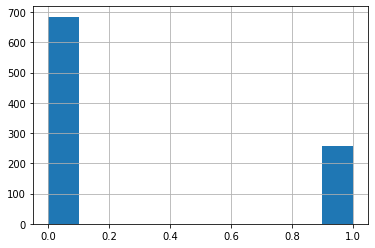

In [46]:
dataset['Diagnosis'].hist()

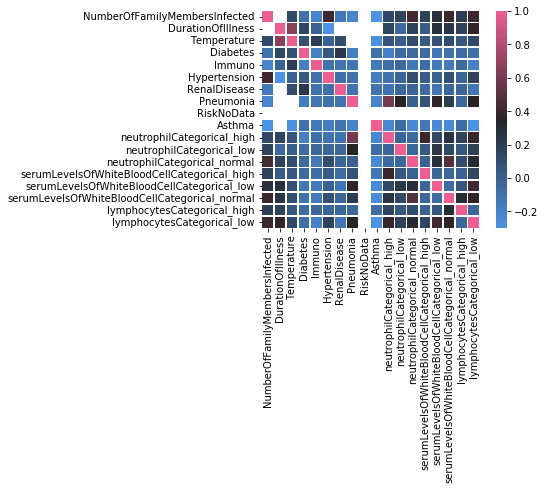

In [47]:
import seaborn as sns
corr = dataset.iloc[:,: -1].corr(method = "pearson")
cmap = sns.diverging_palette(250, 353, 80, 60, center='dark', as_cmap=True)
sns.heatmap(corr, vmax =1, vmin=-0.3, cmap = cmap, square = True, linewidths = 0.3)

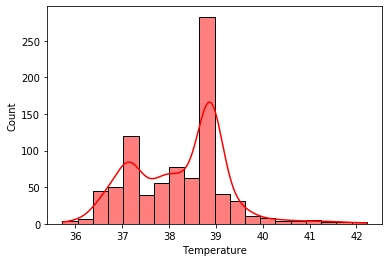

In [48]:
sns.histplot(dataset, x="Temperature", kde=True, color='r')

Konwertujemy zmienną ciągłą "Temperature" do zmiennej dyskretnej, kategorialnej:

In [49]:
dataset['HighFever'] = np.zeros(len(dataset))
dataset['Podgoraczkowy'] = np.zeros(len(dataset))
dataset['SevereFever'] = np.zeros(len(dataset))
dataset['ModerateFever'] = np.zeros(len(dataset))
for i in dataset.index:
    if dataset.at[i, "Temperature"] >38.5:
        if dataset.at[i, "Temperature"] <=39:
           dataset.at[i, 'HighFever'] = 1        
        else:
           dataset.at[i, 'SevereFever'] = 1
        
    if dataset.at[i, "Temperature"] > 37.2:
        if dataset.at[i, "Temperature"] <38:
           dataset.at[i, 'Podgoraczkowy'] = 1
        
    if dataset.at[i, 'Temperature']>= 38.0:
        if dataset.at[i, "Temperature"] <=38.5:
           dataset.at[i, 'ModerateFever'] = 1


dataset = dataset.drop(['Fever'], axis = 1)
dataset = dataset.drop(columns=['Temperature'], axis = 1)

In [50]:
from sklearn import impute

d0 = dataset[dataset['Diagnosis'] == 0]
imp = impute.SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp0 = imp.fit_transform(np.array(d0['SoreThroat']).reshape(-1, 1)).reshape(-1)


d1 = dataset[dataset['Diagnosis'] == 1]
mp = impute.SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp1 = imp.fit_transform(np.array(d1['SoreThroat']).reshape(-1, 1)).reshape(-1)

k0 = 0
k1 = 0
for i in dataset.index:
  if dataset.at[i, 'Diagnosis'] == 0:
        dataset.at[i, 'SoreThroat'] = imp0[k0]
        k0+=1
  else:
        dataset.at[i, 'SoreThroat'] = imp1[k1]
        k1+=1

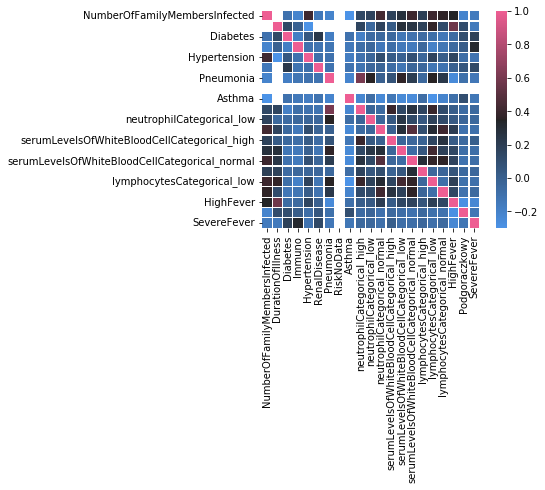

In [51]:
import seaborn as sns
corr = dataset.iloc[:,: -1].corr(method = "pearson")
cmap = sns.diverging_palette(250, 353, 80, 60, center='dark', as_cmap=True)
sns.heatmap(corr, vmax =1, vmin=-0.3, cmap = cmap, square = True, linewidths = 0.2)

In [52]:
dataset = dataset.drop(columns = ['DurationOfIllness', 'neutrophilCategorical_normal'], axis = 1)

In [53]:
def prior_probab(data, Y):
  outcomes = list(data[Y].unique())
  prior = []
  for i in outcomes:
      prior.append(len(data[data[Y]==i])/len(dataset))
  return prior

In [65]:
def calculate_likelihood(data, feature, feat_val, Y, y):
    data = data[data[Y]==y]
    non_zero_rows = len(data) - data[feature].isnull().sum()
    
    if non_zero_rows>0:
       p_x_y = (len(data[data[feature]==feat_val])+1) /(non_zero_rows+2)  #stosujemy wygładzanie Laplace'a (dla alfa = 1)
    else:
       p_x_y = -1

    return p_x_y


def NaiveBayes(data_train, X_test, label_col_name):
    features = list(data_train.columns)
    feautures = features.remove(label_col_name)
    
    prior = prior_probab(data_train, label_col_name)

    Y_pred = []
    numb_features = len(features)
    X_test = X_test.drop([label_col_name], axis = 1)
    
    for x in X_test.index:
        labels = ['Grypa', 'COVID19']
        likelihood = np.ones(len(labels))
        for j in range(len(labels)):
            for i in range(numb_features):
                if X_test.at[x, features[i]]:
                    p_xy = calculate_likelihood(data_train, features[i], 
                                         X_test.at[x, features[i]], label_col_name, j)
                    if p_xy >=0:
                       likelihood[j] *= p_xy
                
        post_prob = np.zeros(len(labels))
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]
        Y_pred.append(int(np.argmax(post_prob)))
                      
   
    Y_pred = np.array(Y_pred)
    return Y_pred

In [66]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset, test_size=0.2, random_state=42)

Y_test = test.iloc[:,0].values
Y_test = Y_test.astype('int32')
Y_pred = NaiveBayes(train, test, "Diagnosis")

from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score
print(confusion_matrix(Y_test, Y_pred))
print(f1_score(Y_test, Y_pred))
accuracy = accuracy_score(Y_test, Y_pred)
print(accuracy)
print(precision_score(Y_test, Y_pred))

[[97 40]
 [ 0 52]]
0.7222222222222222
0.7883597883597884
0.5652173913043478


Będziemy teraz modyfikować nasz zbiór cech, kolejno pozbywając się niektórych, licząc na poprawę naszego modelu:

In [67]:
dataset2 = dataset[:]
dataset2 = dataset2.drop(['BabyDeath', 'Pregnant', 'neutrophilCategorical_high', 'neutrophilCategorical_low'], axis = 1)

In [68]:
train, test = train_test_split(dataset2, test_size=0.20, random_state=42)

Y_test = test.iloc[:,0].values
Y_test = Y_test.astype('int32')
Y_pred = NaiveBayes(train, test, "Diagnosis")

print(confusion_matrix(Y_test, Y_pred))
print(f1_score(Y_test, Y_pred))

[[97 40]
 [ 0 52]]
0.7222222222222222


In [69]:
dataset2 = dataset2.drop(columns =['Diabetes', 'Immuno', 'Hypertension','RenalDisease', 'RiskNoData', 'Asthma', 
                                   "lymphocytesCategorical_low", "lymphocytesCategorical_normal"], axis=1)

In [70]:
train, test = train_test_split(dataset2, test_size=0.20, random_state=42)

Y_test = test.iloc[:,0].values
Y_test = Y_test.astype('int32')
Y_pred = NaiveBayes(train, test, "Diagnosis")

print(confusion_matrix(Y_test, Y_pred))
print(f1_score(Y_test, Y_pred))

[[108  29]
 [  0  52]]
0.7819548872180451


In [71]:
dataset2 = dataset2.drop(columns=['serumLevelsOfWhiteBloodCellCategorical_low', 
                                  'serumLevelsOfWhiteBloodCellCategorical_normal'], axis=1)

In [86]:
train, test = train_test_split(dataset2, test_size=0.25, random_state=42)

Y_test = test.iloc[:,0].values
Y_test = Y_test.astype('int32')
Y_pred = NaiveBayes(train, test, "Diagnosis")

print(confusion_matrix(Y_test, Y_pred))
print(f1_score(Y_test, Y_pred))

[[147  28]
 [  0  61]]
0.8133333333333332


A przy innej wartości parametru "random_state" osiągamy nawet taki wynik:

In [80]:
train, test = train_test_split(dataset2, test_size=0.25, random_state=12)

Y_test = test.iloc[:,0].values
Y_test = Y_test.astype('int32')
Y_pred = NaiveBayes(train, test, "Diagnosis")

print(confusion_matrix(Y_test, Y_pred))
print(f1_score(Y_test, Y_pred))

[[158  10]
 [  0  68]]
0.9315068493150686


Tak wygląda nasz końcowy zbiór cech:

In [82]:
dataset2.isnull().sum()

Diagnosis                                        0
NumberOfFamilyMembersInfected                    0
Diarrhea                                       482
Coughing                                         0
ShortnessOfBreath                              854
SoreThroat                                       0
NauseaVomitting                                505
Fatigue                                        393
Pneumonia                                      741
serumLevelsOfWhiteBloodCellCategorical_high      0
lymphocytesCategorical_high                      0
HighFever                                        0
Podgoraczkowy                                    0
SevereFever                                      0
ModerateFever                                    0
dtype: int64